Extracted files to C:/Users/ASUS ZENBOOK/Downloads/PathLinker_extracted/
Graph loaded successfully!
Number of nodes: 17168
Number of edges: 612516
Degree histogram saved to degree_histogram.png


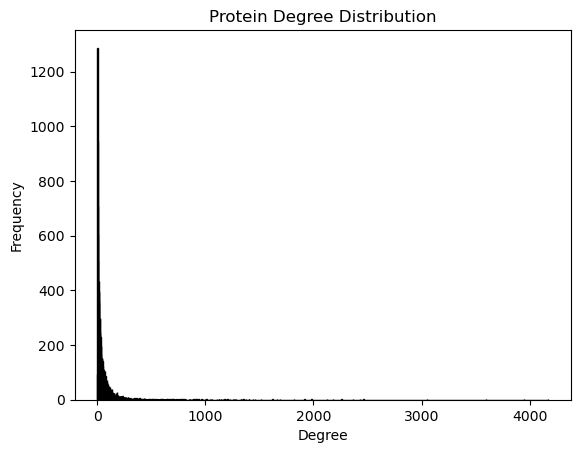

Ranked degrees saved to ranked_degrees.txt


In [4]:
import zipfile
import os
import networkx as nx
import matplotlib.pyplot as plt

# Function to extract the ZIP file
def extract_zip(zip_path, extract_to):
    """Extracts a zip file."""
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
            print(f"Extracted files to {extract_to}")
    except Exception as e:
        print(f"Error extracting zip file: {e}")


# Function to read the interactome data file and construct a graph
def read_interactome(file_path):
    """
    Reads the interactome data file and constructs a directed graph.

    Parameters:
        file_path (str): Path to the interactome data file.

    Returns:
        networkx.DiGraph: A directed graph representing the protein-protein interaction network.
    """
    graph = nx.DiGraph()  # Create a directed graph

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Skip the header or any comments
            if line.startswith("#") or not line.strip():
                continue

            # Split the line into columns
            columns = line.strip().split("\t")
            if len(columns) < 4:
                raise ValueError("Each line in the file must have at least 4 columns.")

            tail, head, edge_weight, edge_type = columns

            # Add edge to the graph with attributes
            graph.add_edge(
                tail,
                head,
                weight=float(edge_weight),  # Convert edge weight to float
                edge_type=edge_type  # Add edge type as an attribute
            )
    
    return graph


def create_degree_histogram_with_names(graph, output_file="degree_histogram_with_names.png"):
    """
    Create a histogram of protein degrees, replacing the "Degree" axis with
    "Number of Proteins" and displaying the names of the top 10 ranked proteins.

    Parameters:
        graph (networkx.Graph): The protein interaction graph.
        output_file (str): Path to save the histogram image file.
    """
    # Compute degrees and sort proteins by degree (highest first)
    degrees = dict(graph.degree())
    sorted_proteins = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the top 10 proteins and their degrees
    top_10_proteins = sorted_proteins[:10]
    protein_names = [protein for protein, _ in top_10_proteins]
    top_10_degrees = [degree for _, degree in top_10_proteins]

    # Create the histogram
    plt.bar(protein_names, top_10_degrees, color='skyblue', edgecolor='black')
    plt.title("Top 10 Protein Degree Distribution")
    plt.xlabel("Number of Proteins")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")  # Rotate the protein names for better visibility
    plt.tight_layout()  # Adjust layout to fit the rotated labels
    plt.savefig(output_file)
    print(f"Degree histogram saved to {output_file}")
    plt.show()



# Function to rank proteins by degree and save to a file
def rank_proteins_by_degree(graph, output_file="ranked_degrees.txt"):
    """
    Rank proteins by degree and save to a file.

    Parameters:
        graph (networkx.Graph): The protein interaction graph.
        output_file (str): Path to the output file.
    """
    degrees = dict(graph.degree())
    ranked = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

    with open(output_file, 'w') as file:
        for protein, degree in ranked:
            file.write(f"{protein}\t{degree}\n")
    print(f"Ranked degrees saved to {output_file}")


# Main function to manage the execution of the analysis
if __name__ == "__main__":
    # Path to the .zip file
    zip_file_path = "C:/Users/ASUS ZENBOOK/Downloads/PathLinker_2018_human-ppi-weighted-cap0_75.txt.zip"
    # Directory to extract the contents
    extract_to_dir = "C:/Users/ASUS ZENBOOK/Downloads/PathLinker_extracted/"

    # Extract the contents of the zip file
    extract_zip(zip_file_path, extract_to_dir)

    # Get the name of the extracted file (assuming there’s only one file in the zip)
    extracted_file_path = os.path.join(extract_to_dir, "PathLinker_2018_human-ppi-weighted-cap0_75.txt")

    try:
        # Step 1: Read the PPI network
        ppi_graph = read_interactome(extracted_file_path)
        print(f"Graph loaded successfully!")
        print(f"Number of nodes: {ppi_graph.number_of_nodes()}")
        print(f"Number of edges: {ppi_graph.number_of_edges()}")

        # Step 2: Create degree histogram
        create_degree_histogram(ppi_graph)

        # Step 3: Rank proteins by degree
        rank_proteins_by_degree(ppi_graph)

    except FileNotFoundError:
        print(f"Error: File '{extracted_file_path}' not found.")
    except UnicodeDecodeError as e:
        print(f"Error decoding file: {e}")
    except Exception as e:
        print(f"Error: {e}")


Extracted files to C:\Users\ASUS ZENBOOK\PPI Extracted files
Graph loaded successfully!
Number of nodes: 17168
Number of edges: 612516
Randomly selected protein: P04629
Directly connected proteins for P04629 saved to C:\Users\ASUS ZENBOOK\PPI Extracted files\P04629_connected_proteins.txt
Degree histogram saved to C:\Users\ASUS ZENBOOK\PPI Extracted files\degree_histogram.png


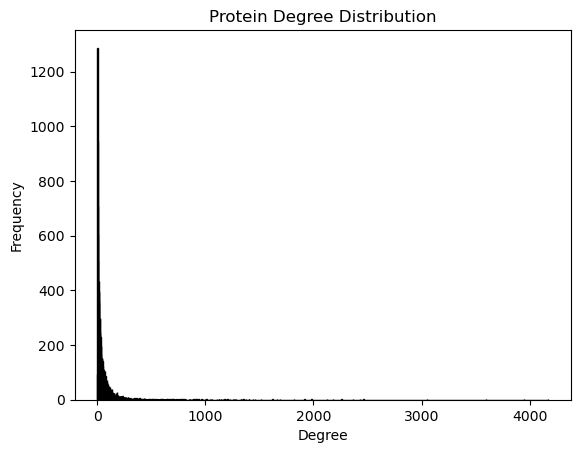

Top 10 proteins histogram saved to C:\Users\ASUS ZENBOOK\PPI Extracted files\top_10_proteins.png


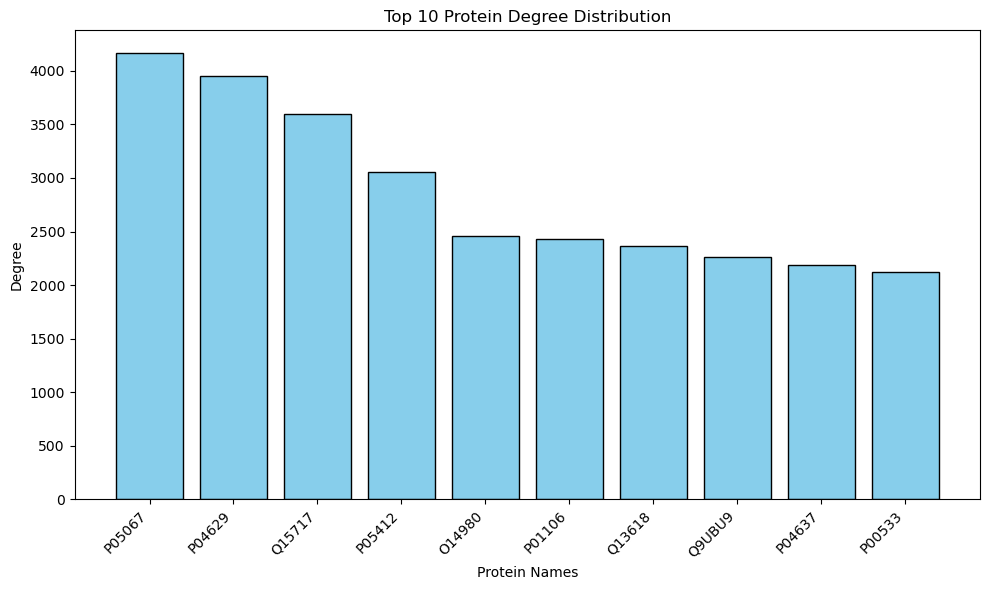

Ranked degrees saved to C:\Users\ASUS ZENBOOK\PPI Extracted files\ranked_degrees.txt


In [16]:
import zipfile
import os
import networkx as nx
import matplotlib.pyplot as plt
import random
import requests

# Function to extract the ZIP file
def extract_zip(zip_path, extract_to):
    """Extracts a zip file."""
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
            print(f"Extracted files to {extract_to}")
    except Exception as e:
        print(f"Error extracting zip file: {e}")

# Function to read the interactome data file and construct a graph
def read_interactome(file_path):
    """
    Reads the interactome data file and constructs a directed graph.
    """
    graph = nx.DiGraph()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.startswith("#") or not line.strip():
                continue
            columns = line.strip().split("\t")
            if len(columns) < 4:
                raise ValueError("Each line in the file must have at least 4 columns.")
            tail, head, edge_weight, edge_type = columns
            graph.add_edge(tail, head, weight=float(edge_weight), edge_type=edge_type)
    return graph

# Function to compute the degree of a single protein
def compute_single_protein_degree(graph, protein_id):
    return graph.degree(protein_id)

# Function to compute degrees for a set of proteins
def compute_set_of_protein_degrees(graph, protein_ids):
    return {protein_id: graph.degree(protein_id) for protein_id in protein_ids}

# Function to create a histogram of protein degrees
def create_degree_histogram(graph, output_folder):
    degrees = [deg for _, deg in graph.degree()]
    plt.hist(degrees, bins=range(1, max(degrees) + 2), edgecolor='black')
    plt.title("Protein Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    output_path = os.path.join(output_folder, "degree_histogram.png")
    plt.savefig(output_path)
    print(f"Degree histogram saved to {output_path}")
    plt.show()

# Function to create a bar chart for the top 10 protein degrees
def create_degree_histogram_with_names(graph, output_folder):
    degrees = dict(graph.degree())
    sorted_proteins = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    top_10_proteins = sorted_proteins[:10]
    protein_names = [protein for protein, _ in top_10_proteins]
    top_10_degrees = [degree for _, degree in top_10_proteins]
    plt.figure(figsize=(10, 6))
    plt.bar(protein_names, top_10_degrees, color='skyblue', edgecolor='black')
    plt.title("Top 10 Protein Degree Distribution")
    plt.xlabel("Protein Names")
    plt.ylabel("Degree")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    output_path = os.path.join(output_folder, "top_10_proteins.png")
    plt.savefig(output_path)
    print(f"Top 10 proteins histogram saved to {output_path}")
    plt.show()

# Function to rank proteins by degree
def rank_proteins_by_degree(graph, output_folder):
    degrees = dict(graph.degree())
    ranked = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    output_file = os.path.join(output_folder, "ranked_degrees.txt")
    with open(output_file, 'w') as file:
        for protein, degree in ranked:
            file.write(f"{protein}\t{degree}\n")
    print(f"Ranked degrees saved to {output_file}")

# Function to list connected proteins
def list_directly_connected_proteins(graph, protein_id, output_folder):
    """
    List all directly connected proteins to a randomly selected protein along with their interaction weights.

    Parameters:
        graph (networkx.Graph): The protein interaction graph.
        protein_id (str): The randomly selected protein ID.
        output_folder (str): Directory to save the output file.
    """
    try:
        if protein_id not in graph:
            raise ValueError(f"Protein {protein_id} not found in the graph.")

        # Degree of the selected protein
        degree = graph.degree(protein_id)

        # Get all directly connected proteins
        connected_proteins = graph[protein_id]

        # Create the output file
        output_file = os.path.join(output_folder, f"{protein_id}_connected_proteins.txt")

        with open(output_file, "w") as file:
            file.write(f"Protein: {protein_id}\n")
            file.write(f"Degree: {degree}\n\n")
            file.write("Connected Proteins:\n")

            # List directly connected proteins and their weights
            for neighbor, attributes in connected_proteins.items():
                interaction_weight = attributes.get("weight", "N/A")
                file.write(f"{neighbor}\tWeight: {interaction_weight}\n")

        print(f"Directly connected proteins for {protein_id} saved to {output_file}")

    except Exception as e:
        print(f"Error: {e}")


# Function to fetch gene names from UniProt API
def fetch_gene_name(uniprot_id):
    try:
        url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data.get("genes", [{}])[0].get("geneName", {}).get("value", "Unknown")
        return "Unknown"
    except Exception as e:
        print(f"Error fetching gene name for {uniprot_id}: {e}")
        return "Unknown"

# Function to map UniProt IDs to gene names
def map_uniprot_to_gene_name(protein_ids, output_folder):
    output_file = os.path.join(output_folder, "uniprot_to_gene_map.txt")
    try:
        with open(output_file, "w") as file:
            file.write("UniProt_ID\tGene_Name\n")
            for pid in protein_ids:
                gene_name = fetch_gene_name(pid)
                file.write(f"{pid}\t{gene_name}\n")
        print(f"UniProt to Gene Name map saved to {output_file}")
    except Exception as e:
        print(f"Error saving UniProt mapping: {e}")

if __name__ == "__main__":
    # Update this to the actual path of your ZIP file
    zip_file_path = "C:\\Users\\ASUS ZENBOOK\\PathLinker_2018_human-ppi-weighted-cap0_75.txt.zip"
    extract_to_dir = os.path.abspath("C:\\Users\\ASUS ZENBOOK\\PPI Extracted files")  # Set output directory
    os.makedirs(extract_to_dir, exist_ok=True)

    extract_zip(zip_file_path, extract_to_dir)

    extracted_file_path = os.path.join(extract_to_dir, "PathLinker_2018_human-ppi-weighted-cap0_75.txt")

    try:
        # Load the PPI network
        ppi_graph = read_interactome(extracted_file_path)
        print(f"Graph loaded successfully!")
        print(f"Number of nodes: {ppi_graph.number_of_nodes()}")
        print(f"Number of edges: {ppi_graph.number_of_edges()}")

        # Top 10 proteins by degree
        degrees = dict(ppi_graph.degree())
        top_10_proteins = [protein for protein, _ in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]]

        # Randomly select a protein from the top 10
        random_protein = random.choice(top_10_proteins)
        print(f"Randomly selected protein: {random_protein}")

        # List directly connected proteins
        list_directly_connected_proteins(ppi_graph, random_protein, extract_to_dir)

        # Additional analysis (if needed)
        create_degree_histogram(ppi_graph, extract_to_dir)
        create_degree_histogram_with_names(ppi_graph, extract_to_dir)
        rank_proteins_by_degree(ppi_graph, extract_to_dir)

    except Exception as e:
        print(f"Error: {e}")

